In [ ]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

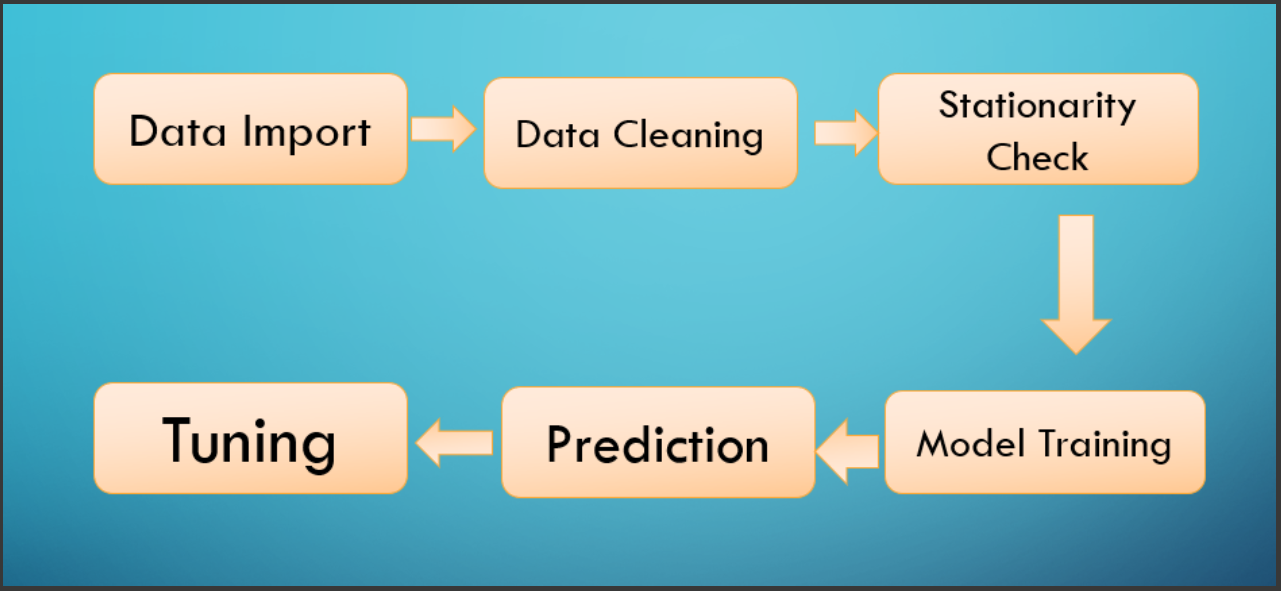

In [ ]:
from IPython.display import Image
Image(filename='capture.png')
# data cleaning like  null removal. Check for stationarity , if its not stationary then make it stationary,
# Model that we will be applying is ARMA model.Prediction and then tuning. So in model , 2 things are changing i.e.
# ar window size and ma window size. If we get the perfect window size then we can easily predict.

In [ ]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
# download data from above url. Its regarding weather data.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA # now statsmodel has removed arma model and instead replaced by ARIMA. We will discuss I later.
# now there are individual orders for AR,I,and MA. AR order is called as p, I - d and MA - q. So by keeping d=0, we can make I=0.
# by making d and q both 0, it will become AR model.
import statsmodels.tsa.api as smt
TempData = pd.read_csv('GlobalLandTemperaturesByCity.csv')
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
#Data Cleaning
TempData = TempData.dropna()
df_Denamrk = TempData[TempData.Country == "Denmark"] # filtering only on denmark data

df_Denamrk.index = pd.to_datetime(df_Denamrk.dt) # index is time in time-series data

df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1) #
df_Denamrk.describe()


,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [ ]:
ts = df_Denamrk['AverageTemperature']
ts

,AverageTemperature
dt,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082
...,...
2013-04-01,6.026
2013-05-01,12.774
2013-06-01,15.685


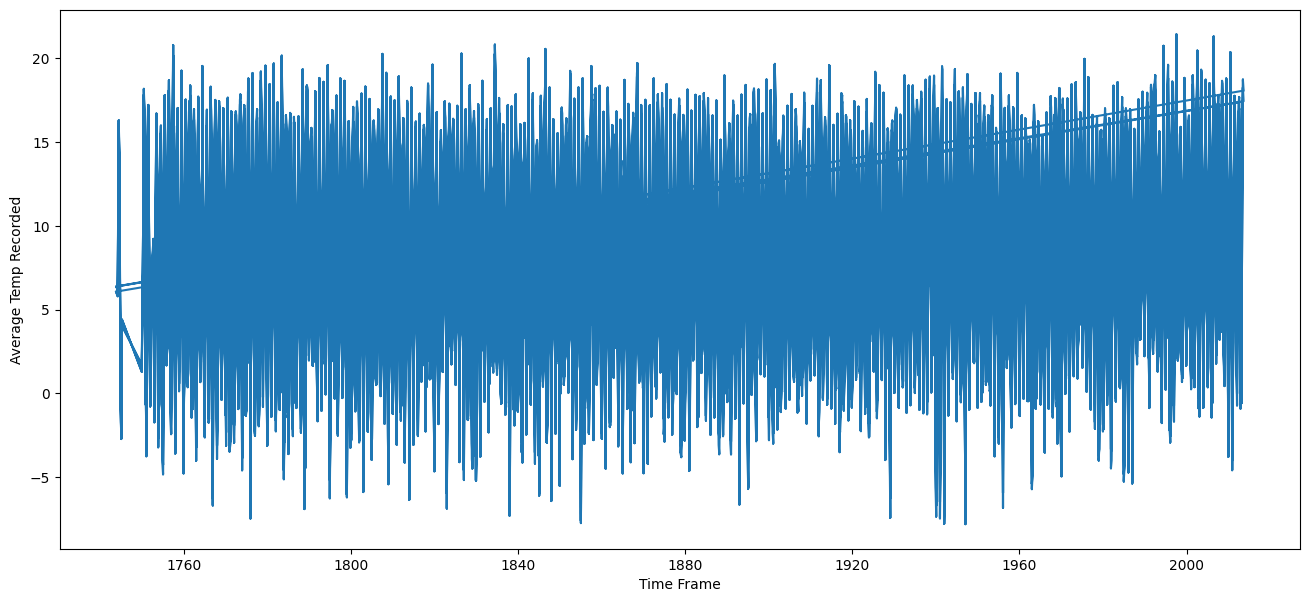

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)
# this is approximately stationary series with mean and variance constant.
# but still we will pass the data throught ADFuller test to make sure stationarity.

In [ ]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(ts, autolag='AIC')

print(f'p-value: {adfuller_result[1]}') # 2.37*10^-27
# its a very small value , lesser than 0.05. So reject null hypothesis.
# now null hypo in adf is data not stationary and alternate is data stationary.
# the another test kpss is literally opposite of what this is.
# So in kpss null hypo-- series stationary and alternate hypo-- series not stationary.
# So we see adfuller and not kpss.
# so in our case its a stationary time series data.
# if stationary nahin hota toh differencing and transformation karte.
# differencing when mena is not constant and transformation when variance not constant.

p-value: 2.3746970456358657e-27


In [ ]:
#First model
newmodel = ARIMA(ts,order=(1,0,1)) # this order is p,d,q order , by d=0 we can make ARIMA ARMA.
# p is window size of AR, d of I and qof MA.
# Now these values we decide by acf,pacf graph which we will see later.
results = newmodel.fit()

predictions = results.predict('01/01/1990', '01/01/1991') # in predict we r giving starting and ending date.
# so basically its a 12 month prediction that i want. And its a monthly prediction. So we will have 12 predictions.

In [ ]:
predictions

,predicted_mean
dt,
1990-01-01,2.886489
1990-02-01,5.788033
1990-03-01,6.420826
1990-04-01,6.940727
1990-05-01,8.522871
1990-06-01,13.703937
1990-07-01,14.616826
1990-08-01,15.615955
1990-09-01,15.830710


In [ ]:
# next getting actual values to compare with predicted values. Taking the 13 months data.
#actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]
#actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]
# Convert the date strings to datetime objects for accurate slicing
start_date = pd.to_datetime('01/01/1990')
end_date = pd.to_datetime('01/01/1991')

# Use .loc to slice the DataFrame based on the datetime objects
# Instead of using .loc directly, use a boolean mask to select rows within the date range
actuals = df_Denamrk[(df_Denamrk.index >= start_date) & (df_Denamrk.index <= end_date)]['AverageTemperature']

# Select the first 13 values if needed
actuals = actuals[:13]
#Now u can compare actual and predicted values and see its closer to what we predicted.

In [ ]:
actuals

,AverageTemperature
dt,
1990-01-01,4.267
1990-02-01,5.895
1990-03-01,6.565
1990-04-01,8.068
1990-05-01,12.944
1990-06-01,15.672
1990-07-01,16.844
1990-08-01,17.402
1990-09-01,12.446


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)
# now we want error which is close to 0. But we r getting the error because of random values of p,q,d.
# so we need to put the window size well.

MAE: 1.812875


### Using For Loop

In [ ]:
# There are 3 methods for finding p,d,q. Whichever u like u can use. 1st method finding window size using loop
import itertools
p = q = range(0, 4)
d = [0]
ij = itertools.product(p,d,q) # gives all the combinations of p,d,q
for parameters in ij:
    mod = ARIMA(ts,order=parameters)
    results = mod.fit()
    # print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    print(f'ARMA{parameters} - AIC:{results.aic}') # there is a parameter in arma model. Called as AIC-Akaike Information Criterion
    # now we r hyperparameter tuning ARMA model. Whichever will have the lowest value, we will select those values.
    # here the lowest is for ARMA(3,0,2)
    # now this process is not that much reliable because it can epend on the varying range.So we r not sure what range it should be.

ARMA(0, 0, 0) - AIC:83922.21132614918
ARMA(0, 0, 1) - AIC:72682.79464658316
ARMA(0, 0, 2) - AIC:66966.26357224587
ARMA(0, 0, 3) - AIC:63785.4458239828
ARMA(1, 0, 0) - AIC:69020.31175733224
ARMA(1, 0, 1) - AIC:65268.10437479222
ARMA(1, 0, 2) - AIC:63179.84816606947
ARMA(1, 0, 3) - AIC:66639.60429369242
ARMA(2, 0, 0) - AIC:60366.30910254581
ARMA(2, 0, 1) - AIC:54388.11129615341
ARMA(2, 0, 2) - AIC:52219.296097668885
ARMA(2, 0, 3) - AIC:50711.739714985844
ARMA(3, 0, 0) - AIC:56175.94558904983
ARMA(3, 0, 1) - AIC:53338.63499373723
ARMA(3, 0, 2) - AIC:50397.21962260757
ARMA(3, 0, 3) - AIC:50417.21274659602


In [ ]:
mod = ARIMA(ts,order=(3,0,2)) # training the ARMA model with window size 3,0,2
results = mod.fit()

In [ ]:
predictions = results.predict('01/01/1990', '01/01/1991')

In [ ]:
from sklearn.metrics import mean_absolute_error # checking for error after prediction.
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)
# the window size can go upto 10-12

MAE: 1.480796


### ACF and PACF plot

- $AR(p)$ - autoregression model i.e. regression of the time series onto itself. The basic assumption is that the current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as $p$. To determine the initial $p$, you need to look at the PACF plot and find the biggest significant lag after which **most** other lags become insignificant.
- $MA(q)$ - moving average model. Without going into too much detail, this models the error of the time series, again with the assumption that the current error depends on the previous with some lag, which is referred to as $q$. The initial value can be found on the ACF plot with the same logic as before.

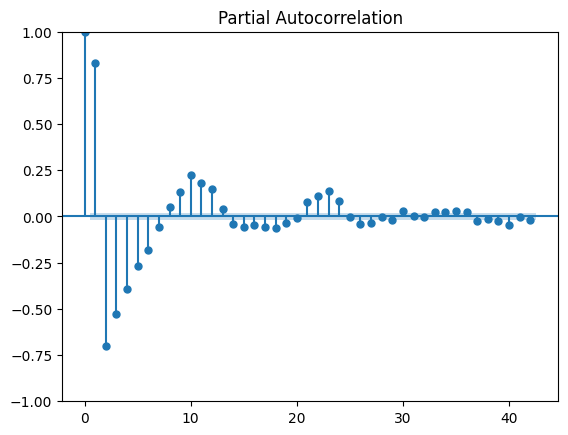

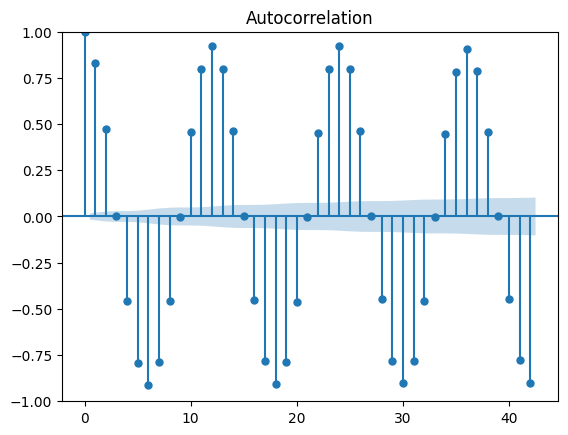

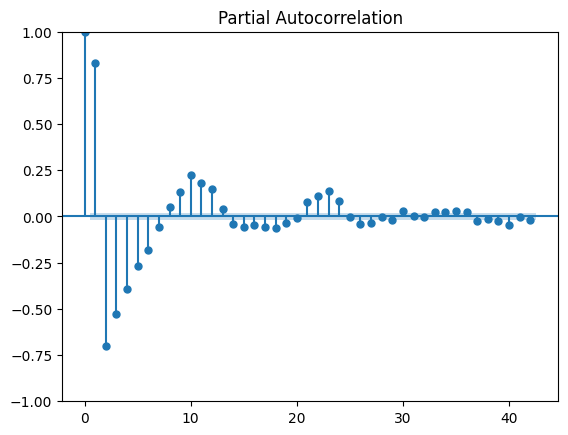

In [ ]:
smt.graphics.plot_acf(ts) #autocorrelation graph
smt.graphics.plot_pacf(ts) # partial autocorrelation graph
# the correlation value ranges from -1 to 1 so here we have values from -1 to _1.
# now we have to find that lag when our corr is close to zero.
# Now AR window size is decide by pacf and ma window size is decided by acf.
# Now at lag 0 , correlation is highest.
# x-axis lag, y-axis correlation or partial autocorrelation.
# Now count the straight line with bubbles in chart. like lag0,lag1,..etc
# lag7 is closest to 0. So we will take p=6.
# next in acf for ma-- is 2 i.e. the moment it gets 0 or just very close to zero stop there.
# so p=6, q=2

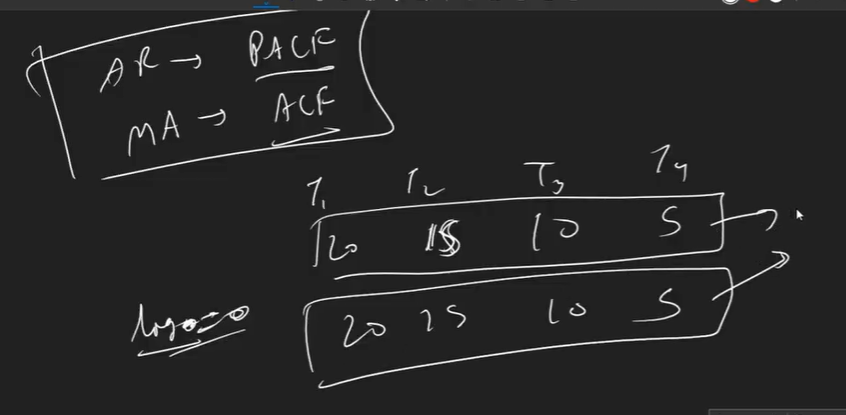

In [ ]:
mod = ARIMA(ts,order=(6,0,2))
results = mod.fit()
predictions = results.predict('01/01/1990', '01/01/1991')
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.545027


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
# next is 3rd option. used for finding value of p and  q. This is called as auto-arima.
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p=1,
                              start_q=1,
                              max_p=8,
                              max_q=8,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
arimamodel(ts)